In [18]:
import numpy as np

def convert_arr_to_streamfile(filename: str, profile: np.ndarray, n_passes: int, sputter_rate: float, dwell_time_base: float, shuffle_order: bool = True):
    # Dwell time base = 100ns
    # Sputter rate = ?
    pixelsize = 100e-9 #um
    profile = profile  * np.power(pixelsize,2) / (n_passes * sputter_rate * dwell_time_base)

    # create a list of lists
    profile_list = []
    for i in range(profile.shape[0]):
        for j in range(profile.shape[1]):
            profile_list.append([profile[i,j], i, j])
    if shuffle_order:
        np.random.shuffle(profile_list)

    # write the header
    with open(filename, "w", newline="\r\n") as f:
        f.write("s\n")
        f.write(str(n_passes)+"\n")
        f.write(str(profile.shape[0]*profile.shape[1])+"\n")

        for i in range(len(profile_list)):
            f.write(str(int(profile_list[i][0]))+" "+str(profile_list[i][1])+" "+str(profile_list[i][2])+"\n")

In [19]:
dir_path = r"C:\Users\Admin\Github\vulcan\vulcan\submicron_2022-10-24.05-57-53PM\sub_um_sheet.npy"
# dir_path2 = r"C:\Users\Admin\Github\vulcan\vulcan\submicron_2022-10-24.05-57-53PM\sub_um_escape_250nm.npy"
# dir_path3 = r"C:\Users\Admin\Github\vulcan\vulcan\submicron_2022-10-24.05-57-53PM\sub_um_escape.npy"
array = np.load(dir_path)
# array2 = np.load(dir_path2)
# array3 = np.load(dir_path3)

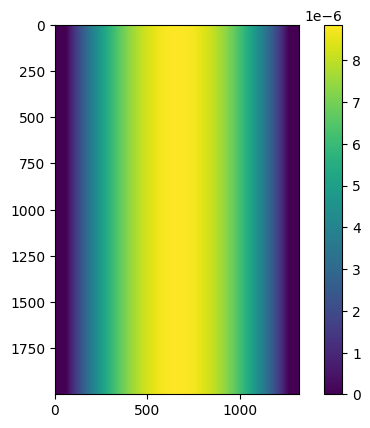

max:  8.8516444520792e-06


In [20]:
import matplotlib.pyplot as plt
plt.imshow(array)
plt.colorbar()
plt.show()

print("max: ", np.max(array))

In [21]:
convert_arr_to_streamfile("sub_um_sheet.str", array, 1000, 25e-18, 100e-9)

In [15]:
from autoscript_sdb_microscope_client import SdbMicroscopeClient
from autoscript_sdb_microscope_client.enumerations import *
from autoscript_sdb_microscope_client.structures import *

microscope = SdbMicroscopeClient()
microscope.connect("10.0.0.1")

microscope.patterning.set_default_beam_type(BeamType.ION)
microscope.patterning.set_default_application_file("Si")

microscope.patterning.clear_patterns()



Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]


In [101]:
spd = StreamPatternDefinition.load("sub_um_sheet.str")


In [102]:
print("bit depth", spd.bit_depth)
print("points: ", len(spd.points))
print("repeat count: ", spd.repeat_count)

bit depth 12
points:  2642000
repeat count:  1000


In [103]:
pattern = microscope.patterning.create_stream(0, 0, spd)

ApplicationServerException: An error occurred in the XT microscope server.
Could not set pattern property, 'StreamPatternFile', due to error:Invalid format stream file

In [51]:
# base spd
profile, n_passes, sputter_rate, dwell_time_base = array, 1000, 25, 100e-6
profile = profile / (n_passes * sputter_rate * dwell_time_base)

# create a list of lists
point_count = n_passes
points = np.zeros(shape=(point_count, 4), dtype=object)

for i in range(profile.shape[0]):
    for j in range(profile.shape[1]):
        points[i] =[100, i, j, 0]


print(len(points))
# np.random.shuffle(points)


IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [ ]:
print(points[:5])

[[100, 1537, 101, 0], [100, 1490, 916, 0], [100, 1261, 205, 0], [100, 848, 922, 0], [100, 853, 444, 0]]


In [50]:
spd = StreamPatternDefinition()
spd.points = np.asarray(profile_list)
spd.repeat_count = point_count

pattern = microscope.patterning.create_stream(0, 0, spd)

ApplicationServerException: An error occurred in the XT microscope server.
Could not set pattern property, 'StreamPatternFile', due to error:Unknown Error